# 에너지 효율 예측

# 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset` 디렉토리에 있는 `ENB2012_data.xlsx` 파일을 읽어오세요.
 - 상위 5개 샘플(행) 조회

In [2]:
# 코드를 입력해 주세요
df = pd.read_excel('/mnt/elice/dataset/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X1</th>
      <th>X2</th>
      <th>X3</th>
      <th>X4</th>
      <th>X5</th>
      <th>X6</th>
      <th>X7</th>
      <th>X8</th>
      <th>Y1</th>
      <th>Y2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>3</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>4</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>5</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.90</td>
      <td>563.5</td>
      <td>318.5</td>
      <td>122.50</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>20.84</td>
      <td>28.28</td>
    </tr>
  </tbody>
</table>
</div>

 - 샘플과 특성 개수 확인 (shape)

In [3]:
# 코드를 입력해 주세요
df.shape # (행, 열)

(768, 10)

<p><strong>[출력 결과]</strong></p><pre>(768, 10)</pre>

 - 아래 열 이름을 참고하여 df의 열 이름을 변경하세요.
 - ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [4]:
# 코드를 입력해 주세요
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>relative_compactness</th>
      <th>surface_area</th>
      <th>wall_area</th>
      <th>roof_area</th>
      <th>overall_height</th>
      <th>orientation</th>
      <th>glazing_area</th>
      <th>glazing_area_distribution</th>
      <th>heating_load</th>
      <th>cooling_load</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>3</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>4</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>5</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.90</td>
      <td>563.5</td>
      <td>318.5</td>
      <td>122.50</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>20.84</td>
      <td>28.28</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>763</th>
      <td>0.64</td>
      <td>784.0</td>
      <td>343.0</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>17.88</td>
      <td>21.40</td>
    </tr>
    <tr>
      <th>764</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>2</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.54</td>
      <td>16.88</td>
    </tr>
    <tr>
      <th>765</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>3</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.44</td>
      <td>17.11</td>
    </tr>
    <tr>
      <th>766</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>4</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.48</td>
      <td>16.61</td>
    </tr>
    <tr>
      <th>767</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.64</td>
      <td>16.03</td>
    </tr>
  </tbody>
</table>
<p>768 rows × 10 columns</p>
</div>

 - 정보를 조회하세요

In [5]:
# 코드를 입력해 주세요
df.info() # 결측치 확인, 숫자형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<p><strong>[출력 결과]</strong></p><pre><class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
</pre>

## 결측치 처리
 - 결측치를 조회하세요.

In [6]:
# 코드를 입력해 주세요
df.isna().sum() # 컬럼별 결측치 확인

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64</pre>

## 데이터 분석
 - df.hist()를 이용하여 히스토그램을 출력하세요.
 - hist의 옵션으로 figsize=(15,15), bins=5을 적용하세요.

array([[<AxesSubplot: title={'center': 'relative_compactness'}>,
        <AxesSubplot: title={'center': 'surface_area'}>,
        <AxesSubplot: title={'center': 'wall_area'}>],
       [<AxesSubplot: title={'center': 'roof_area'}>,
        <AxesSubplot: title={'center': 'overall_height'}>,
        <AxesSubplot: title={'center': 'orientation'}>],
       [<AxesSubplot: title={'center': 'glazing_area'}>,
        <AxesSubplot: title={'center': 'glazing_area_distribution'}>,
        <AxesSubplot: title={'center': 'heating_load'}>],
       [<AxesSubplot: title={'center': 'cooling_load'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

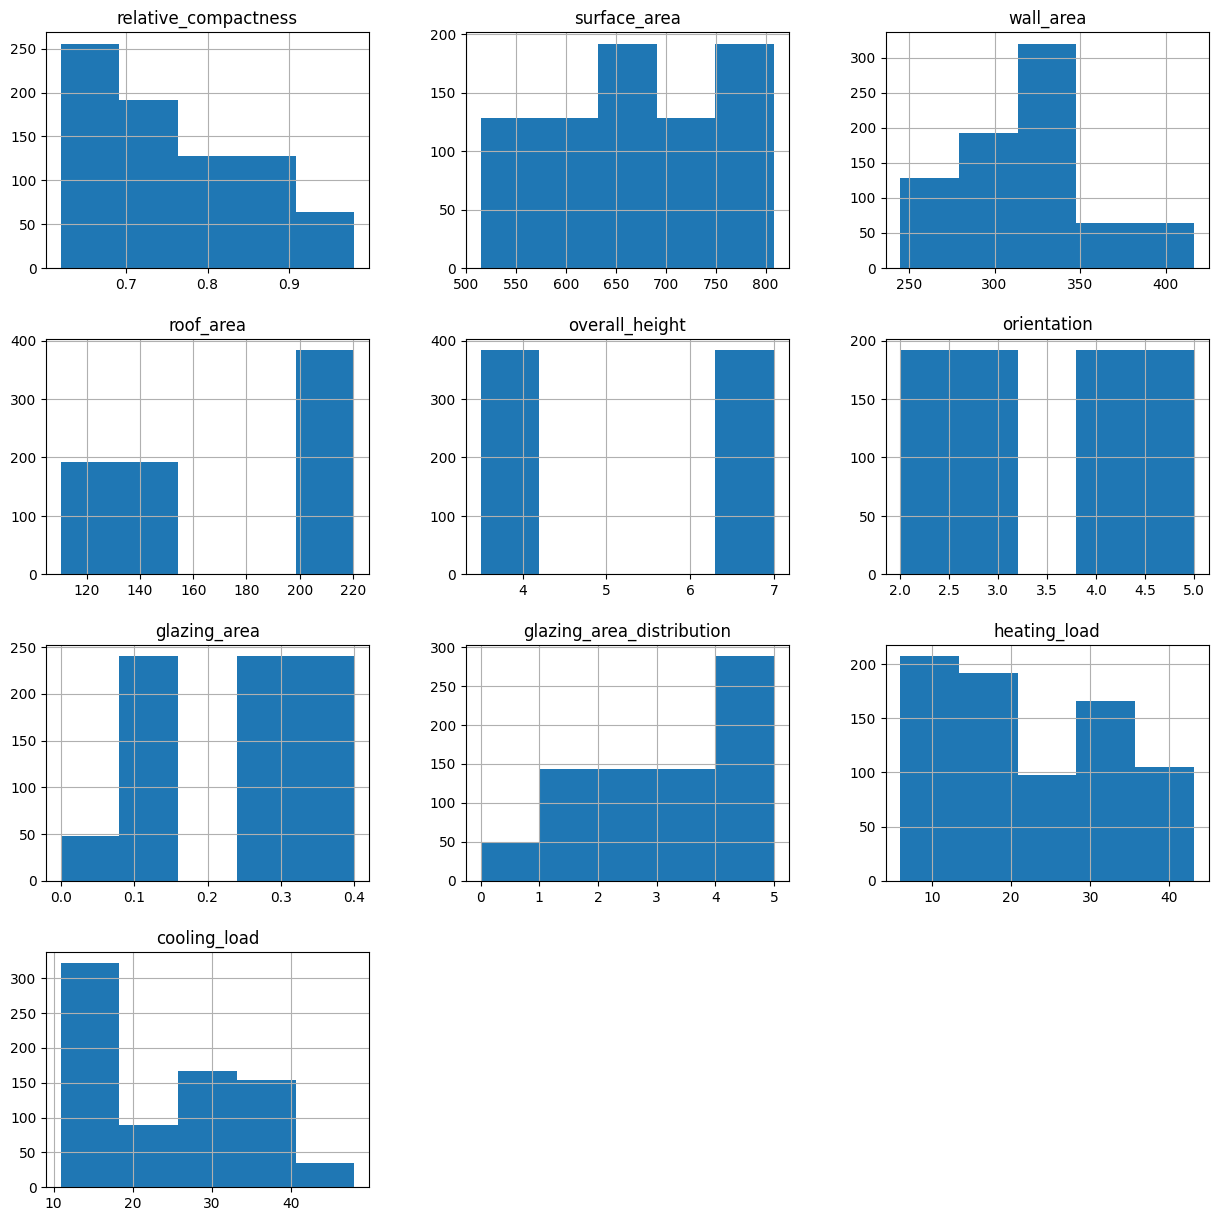

In [7]:
# 코드를 입력해 주세요
df.hist(figsize=(15,15), bins=5)

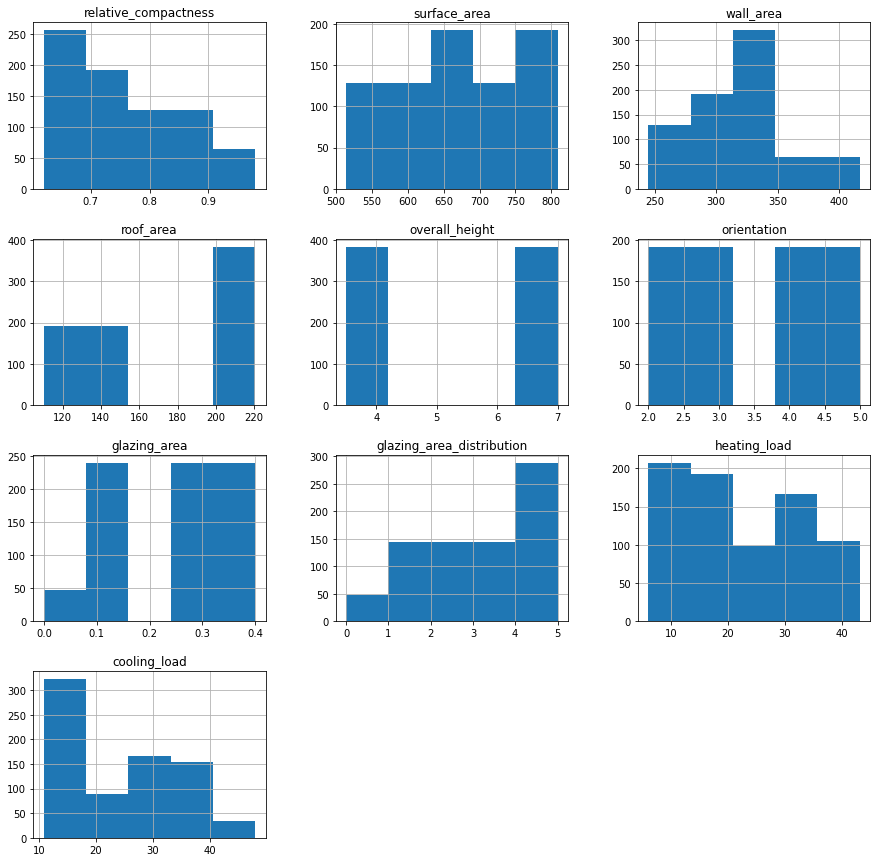

 - 각 열의 이상치 존재 여부를 확인하기 위해 boxplot를 그려보세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 12 Axes></pre>

<AxesSubplot: >

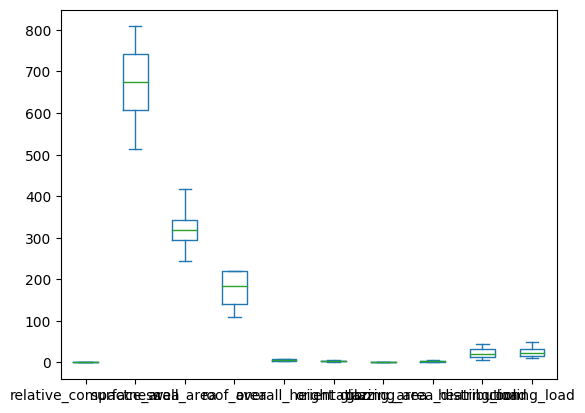

In [8]:
# 코드를 입력해 주세요
df.plot(kind='box')

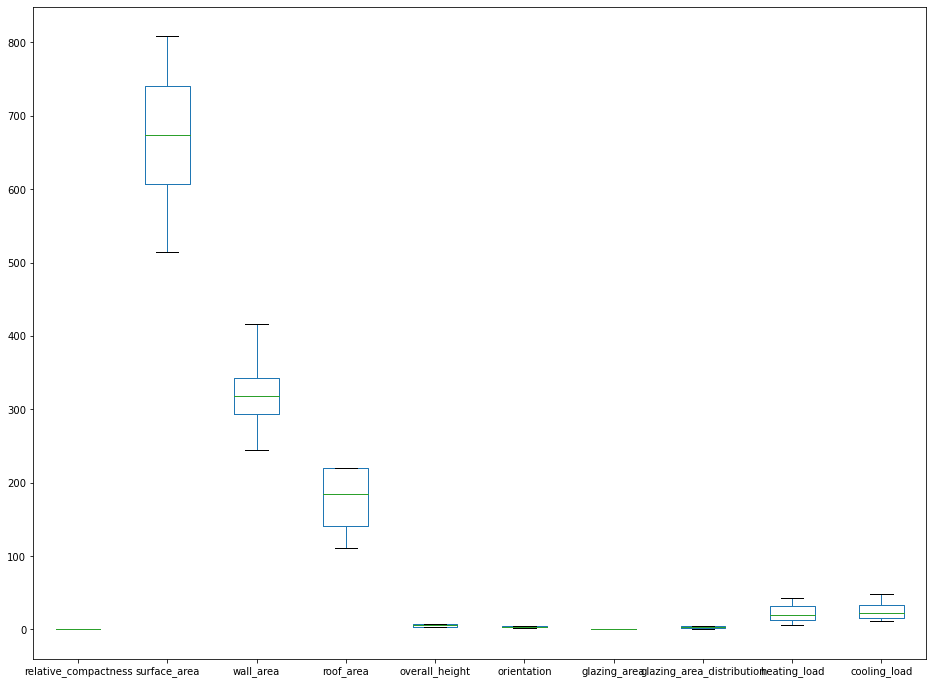

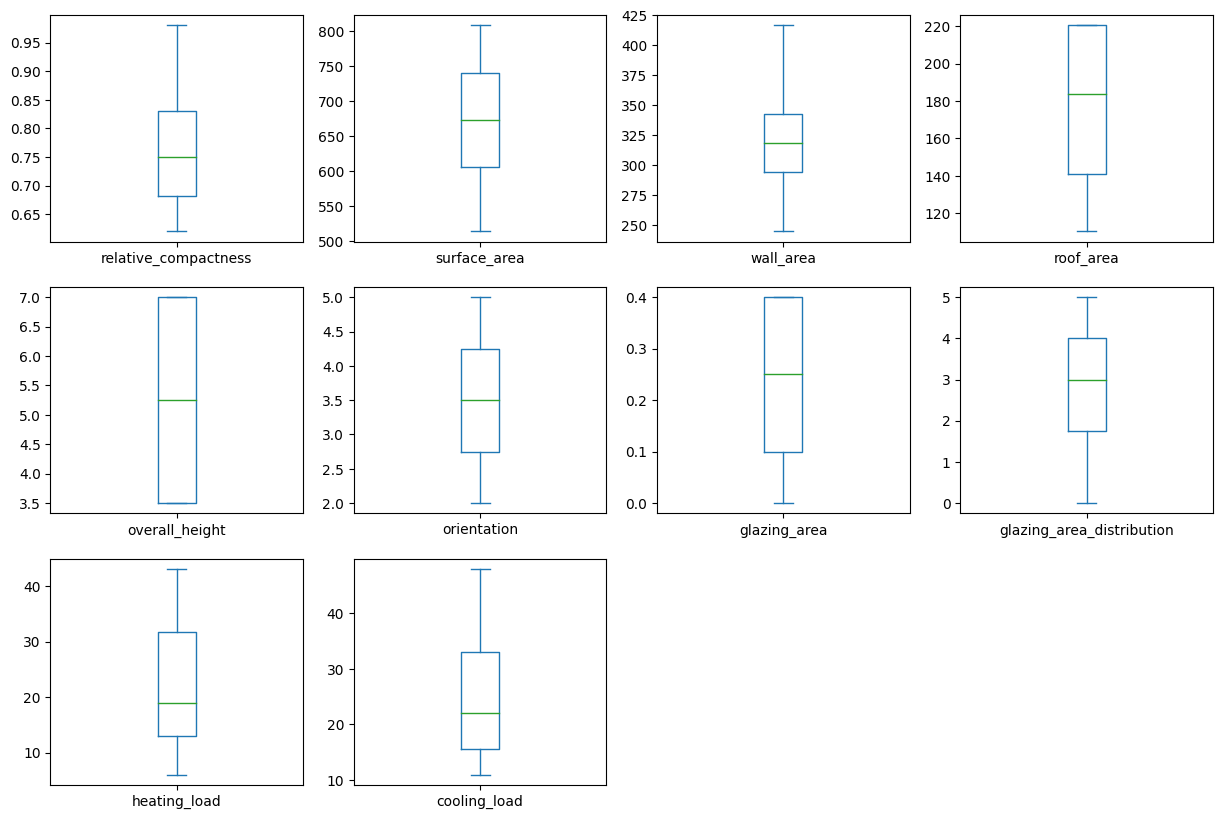

In [9]:
df.plot(kind='box', figsize=(15,10), subplots=True, layout=(3, 4)) # 컬럼별로 boxplot 그리기
plt.show()

<p><strong>[출력 결과]</strong></p><pre><Figure size 1152x864 with 1 Axes></pre>

 - 각 열 별 상관 관계를 출력하세요.
   - 반올림 함수를 이용하여 소수점 셋째자리까지만 출력하세요.

In [10]:
# 코드를 입력해 주세요
df.corr()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
surface_area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
wall_area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
roof_area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
overall_height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
glazing_area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
glazing_area_distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
heating_load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
cooling_load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>relative_compactness</th>
      <th>surface_area</th>
      <th>wall_area</th>
      <th>roof_area</th>
      <th>overall_height</th>
      <th>orientation</th>
      <th>glazing_area</th>
      <th>glazing_area_distribution</th>
      <th>heating_load</th>
      <th>cooling_load</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>relative_compactness</th>
      <td>1.000</td>
      <td>-0.992</td>
      <td>-0.204</td>
      <td>-0.869</td>
      <td>0.828</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.622</td>
      <td>0.634</td>
    </tr>
    <tr>
      <th>surface_area</th>
      <td>-0.992</td>
      <td>1.000</td>
      <td>0.196</td>
      <td>0.881</td>
      <td>-0.858</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>-0.000</td>
      <td>-0.658</td>
      <td>-0.673</td>
    </tr>
    <tr>
      <th>wall_area</th>
      <td>-0.204</td>
      <td>0.196</td>
      <td>1.000</td>
      <td>-0.292</td>
      <td>0.281</td>
      <td>0.000</td>
      <td>-0.000</td>
      <td>0.000</td>
      <td>0.456</td>
      <td>0.427</td>
    </tr>
    <tr>
      <th>roof_area</th>
      <td>-0.869</td>
      <td>0.881</td>
      <td>-0.292</td>
      <td>1.000</td>
      <td>-0.973</td>
      <td>0.000</td>
      <td>-0.000</td>
      <td>-0.000</td>
      <td>-0.862</td>
      <td>-0.863</td>
    </tr>
    <tr>
      <th>overall_height</th>
      <td>0.828</td>
      <td>-0.858</td>
      <td>0.281</td>
      <td>-0.973</td>
      <td>1.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.889</td>
      <td>0.896</td>
    </tr>
    <tr>
      <th>orientation</th>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>1.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>-0.003</td>
      <td>0.014</td>
    </tr>
    <tr>
      <th>glazing_area</th>
      <td>0.000</td>
      <td>0.000</td>
      <td>-0.000</td>
      <td>-0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>1.000</td>
      <td>0.213</td>
      <td>0.270</td>
      <td>0.208</td>
    </tr>
    <tr>
      <th>glazing_area_distribution</th>
      <td>0.000</td>
      <td>-0.000</td>
      <td>0.000</td>
      <td>-0.000</td>
      <td>0.000</td>
      <td>0.000</td>
      <td>0.213</td>
      <td>1.000</td>
      <td>0.087</td>
      <td>0.051</td>
    </tr>
    <tr>
      <th>heating_load</th>
      <td>0.622</td>
      <td>-0.658</td>
      <td>0.456</td>
      <td>-0.862</td>
      <td>0.889</td>
      <td>-0.003</td>
      <td>0.270</td>
      <td>0.087</td>
      <td>1.000</td>
      <td>0.976</td>
    </tr>
    <tr>
      <th>cooling_load</th>
      <td>0.634</td>
      <td>-0.673</td>
      <td>0.427</td>
      <td>-0.863</td>
      <td>0.896</td>
      <td>0.014</td>
      <td>0.208</td>
      <td>0.051</td>
      <td>0.976</td>
      <td>1.000</td>
    </tr>
  </tbody>
</table>
</div>

 - 각 열 별 상관 관계 값을 히트맵으로 시각화하세요.
 - 컬러맵은 Greens, 값은 소수점 둘째자리까지 출력하세요.

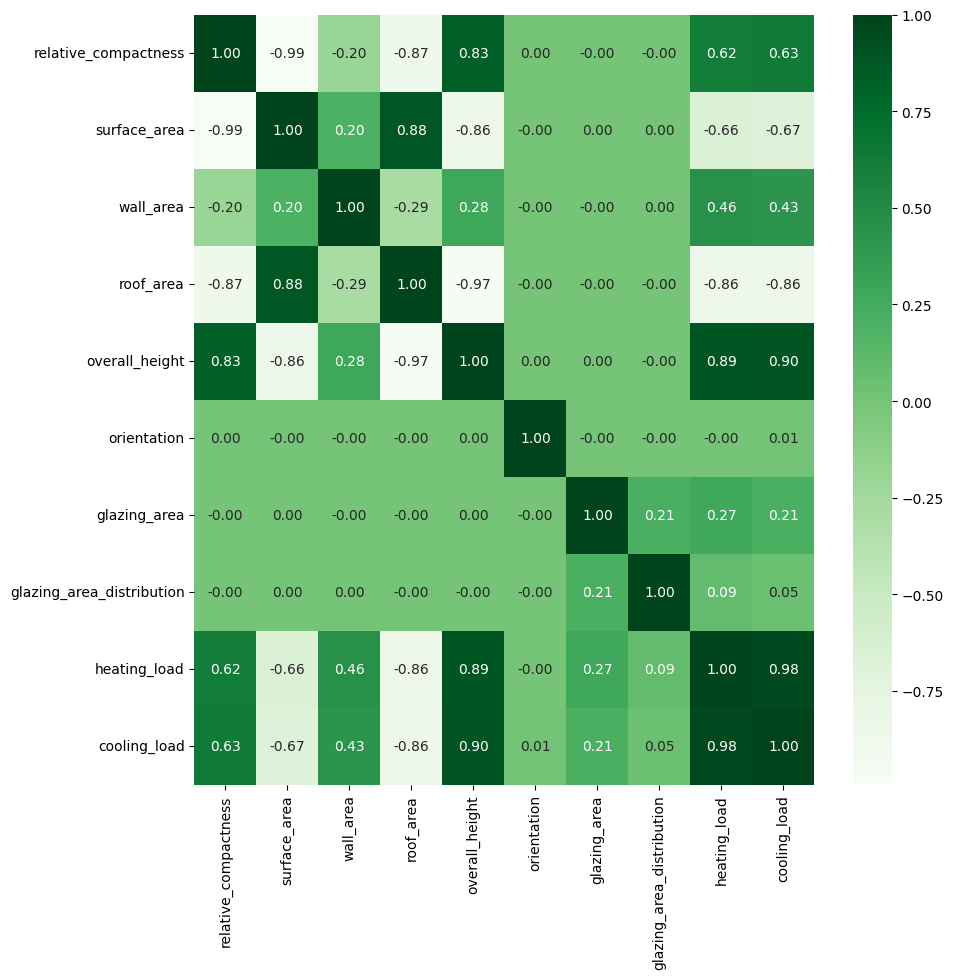

In [11]:
# 코드를 입력해 주세요
# 위에서 계산한 컬럼별 상관 관계를 heatmap으로 시각화하세요.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

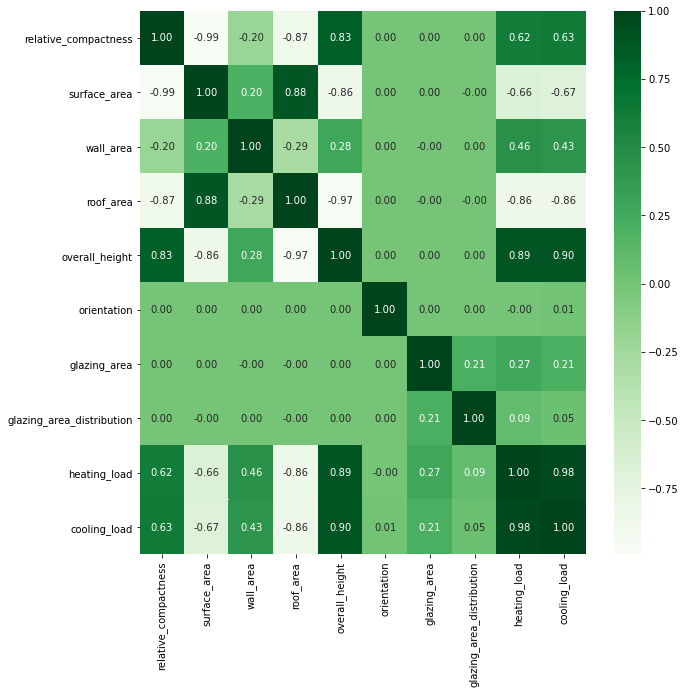

## 특성 공학
 - 종속 변수 headting load와 cooling load를 더해서 load 열을 생성하세요

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x720 with 2 Axes></pre>

In [12]:
# 코드를 입력해 주세요
df['load'] = df['heating_load'] + df['cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>relative_compactness</th>
      <th>surface_area</th>
      <th>wall_area</th>
      <th>roof_area</th>
      <th>overall_height</th>
      <th>orientation</th>
      <th>glazing_area</th>
      <th>glazing_area_distribution</th>
      <th>heating_load</th>
      <th>cooling_load</th>
      <th>load</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>3</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>4</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>5</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.90</td>
      <td>563.5</td>
      <td>318.5</td>
      <td>122.50</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>20.84</td>
      <td>28.28</td>
      <td>49.12</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>763</th>
      <td>0.64</td>
      <td>784.0</td>
      <td>343.0</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>17.88</td>
      <td>21.40</td>
      <td>39.28</td>
    </tr>
    <tr>
      <th>764</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>2</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.54</td>
      <td>16.88</td>
      <td>33.42</td>
    </tr>
    <tr>
      <th>765</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>3</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.44</td>
      <td>17.11</td>
      <td>33.55</td>
    </tr>
    <tr>
      <th>766</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>4</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.48</td>
      <td>16.61</td>
      <td>33.09</td>
    </tr>
    <tr>
      <th>767</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.64</td>
      <td>16.03</td>
      <td>32.67</td>
    </tr>
  </tbody>
</table>
<p>768 rows × 11 columns</p>
</div>

#### 분산(표준편차)이 0인 열이 있는지 확인하세요.

In [13]:
# 코드를 입력해 주세요
df.var() # 분산이 0이다 -> 데이터가 모두 같은 값을 가진다. 즉, Y에 상관없이 일정하므로 학습에 도움되지 않는다.

relative_compactness            0.011189
surface_area                 7759.163842
wall_area                    1903.269883
roof_area                    2039.963060
overall_height                  3.066493
orientation                     1.251630
glazing_area                    0.017748
glazing_area_distribution       2.405476
heating_load                  101.812216
cooling_load                   90.502983
load                          379.663465
dtype: float64

<p><strong>[출력 결과]</strong></p><pre>relative_compactness            0.011189
surface_area                 7759.163842
wall_area                    1903.269883
roof_area                    2039.963060
overall_height                  3.066493
orientation                     1.251630
glazing_area                    0.017748
glazing_area_distribution       2.405476
heating_load                  101.812216
cooling_load                   90.502983
load                          379.663465
dtype: float64</pre>

#### 상관관계가 0.97 이상인 특성들이 있는지 확인하세요.
 - relative_compactness와 surface_area의 열 별 상관관계를 소수점 셋째자리까지 출력하세요.

In [14]:
# 코드를 입력해 주세요
np.round(df.corr()[['relative_compactness', 'surface_area']], 3) # fancy indexing으로 두 가지 컬럼에 대한 상관관계만 추출

,relative_compactness,surface_area
relative_compactness,1.000,-0.992
surface_area,-0.992,1.000
wall_area,-0.204,0.196
roof_area,-0.869,0.881
overall_height,0.828,-0.858
orientation,0.000,-0.000
glazing_area,-0.000,0.000
glazing_area_distribution,-0.000,0.000
heating_load,0.622,-0.658
cooling_load,0.634,-0.673


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>relative_compactness</th>
      <th>surface_area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>relative_compactness</th>
      <td>1.000</td>
      <td>-0.992</td>
    </tr>
    <tr>
      <th>surface_area</th>
      <td>-0.992</td>
      <td>1.000</td>
    </tr>
    <tr>
      <th>wall_area</th>
      <td>-0.204</td>
      <td>0.196</td>
    </tr>
    <tr>
      <th>roof_area</th>
      <td>-0.869</td>
      <td>0.881</td>
    </tr>
    <tr>
      <th>overall_height</th>
      <td>0.828</td>
      <td>-0.858</td>
    </tr>
    <tr>
      <th>orientation</th>
      <td>0.000</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>glazing_area</th>
      <td>0.000</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>glazing_area_distribution</th>
      <td>0.000</td>
      <td>-0.000</td>
    </tr>
    <tr>
      <th>heating_load</th>
      <td>0.622</td>
      <td>-0.658</td>
    </tr>
    <tr>
      <th>cooling_load</th>
      <td>0.634</td>
      <td>-0.673</td>
    </tr>
    <tr>
      <th>load</th>
      <td>0.632</td>
      <td>-0.669</td>
    </tr>
  </tbody>
</table>
</div>

 - roof_area와 overall_height의 열 별 상관관계를 소수점 셋째자리까지 출력하세요.

In [15]:
# 코드를 입력해 주세요
np.round(df.corr()[['roof_area', 'overall_height']], 3)

,roof_area,overall_height
relative_compactness,-0.869,0.828
surface_area,0.881,-0.858
wall_area,-0.292,0.281
roof_area,1.000,-0.973
overall_height,-0.973,1.000
orientation,-0.000,0.000
glazing_area,-0.000,0.000
glazing_area_distribution,-0.000,-0.000
heating_load,-0.862,0.889
cooling_load,-0.863,0.896


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>roof_area</th>
      <th>overall_height</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>relative_compactness</th>
      <td>-0.869</td>
      <td>0.828</td>
    </tr>
    <tr>
      <th>surface_area</th>
      <td>0.881</td>
      <td>-0.858</td>
    </tr>
    <tr>
      <th>wall_area</th>
      <td>-0.292</td>
      <td>0.281</td>
    </tr>
    <tr>
      <th>roof_area</th>
      <td>1.000</td>
      <td>-0.973</td>
    </tr>
    <tr>
      <th>overall_height</th>
      <td>-0.973</td>
      <td>1.000</td>
    </tr>
    <tr>
      <th>orientation</th>
      <td>0.000</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>glazing_area</th>
      <td>-0.000</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>glazing_area_distribution</th>
      <td>-0.000</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>heating_load</th>
      <td>-0.862</td>
      <td>0.889</td>
    </tr>
    <tr>
      <th>cooling_load</th>
      <td>-0.863</td>
      <td>0.896</td>
    </tr>
    <tr>
      <th>load</th>
      <td>-0.867</td>
      <td>0.898</td>
    </tr>
  </tbody>
</table>
</div>

 - surface_area에 따른 load의 변화를 lineplot을 이용하여 overall_height 별로 시각화하세요.
   * sns.lineplot(x= , y=, data=df)

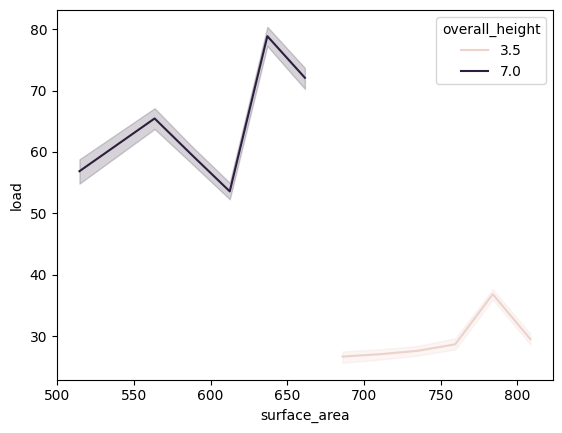

In [16]:
# 코드를 입력해 주세요
sns.lineplot(x= 'surface_area', y = 'load', hue = 'overall_height', data=df)
plt.show()

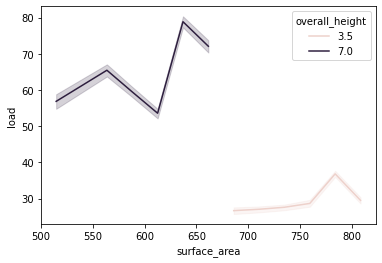

 - overall_height 별 샘플 수를 countplot으로 시각화하세요.
   * sns.countplot(x= , data=df)

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

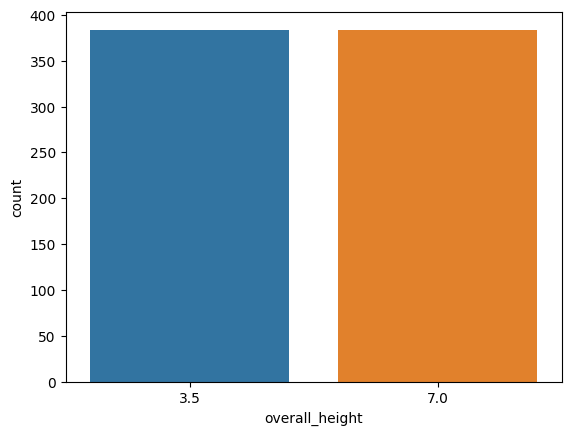

In [17]:
# 코드를 입력해 주세요
sns.countplot(x = 'overall_height', data=df)
plt.show()

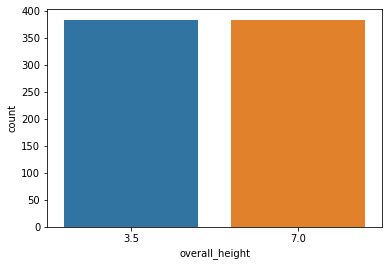

 - overall_height 별 load의 값의 평균을 barplot으로 시각화하세요.
   * sns.barplot(x= , y= , data=df)


<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

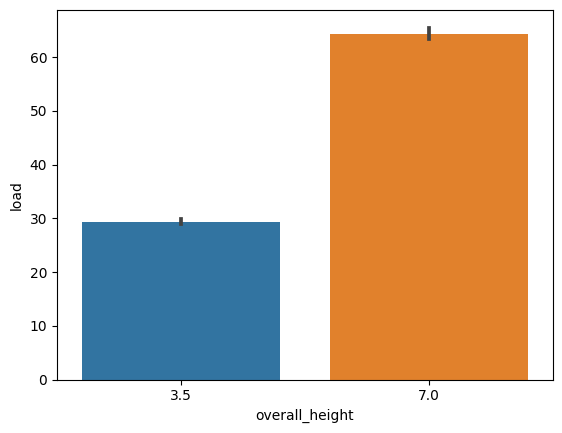

In [18]:
# 코드를 입력해 주세요
sns.barplot(x = 'overall_height', y = 'load', data=df)
plt.show()

# 즉, seaborn에 있는 그래프들은 통계적으로 요약해주는 기능이 있다!(count를 구해주든지, mean을 구해주든지 등등)

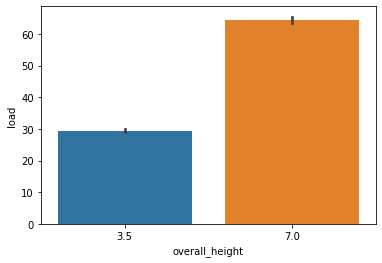

## 학습에 사용할 열 선택
 - Y = load 열
 - X = load, heating_load, cooling_load, relative_compactness, roof_area를 제외한 나머지 열

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

In [19]:
# 제외할 특성은 주석처리하세요. (다중공선성 문제 발생할 수 있어서 제외)
features = [
    #'relative_compactness', 
    'surface_area', 
    'wall_area', 
    #'roof_area',
    'overall_height',
    #'orientation',
    'glazing_area',
    'glazing_area_distribution',
]

In [20]:
# 코드를 입력해 주세요
# X와 Y를 분리하세요.
X = df[features]
Y = df['load']

 - X의 상위 5개 행과 shape을 출력하세요.

In [21]:
# 코드를 입력해 주세요
display(X.head()) # load관련 열이 없는 것을 알 수 있다.
X.shape

,surface_area,wall_area,overall_height,glazing_area,glazing_area_distribution
0,514.5,294.0,7.0,0.0,0
1,514.5,294.0,7.0,0.0,0
2,514.5,294.0,7.0,0.0,0
3,514.5,294.0,7.0,0.0,0
4,563.5,318.5,7.0,0.0,0


(768, 5)

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>surface_area</th>
      <th>wall_area</th>
      <th>overall_height</th>
      <th>glazing_area</th>
      <th>glazing_area_distribution</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>514.5</td>
      <td>294.0</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>514.5</td>
      <td>294.0</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>514.5</td>
      <td>294.0</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>514.5</td>
      <td>294.0</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>563.5</td>
      <td>318.5</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

<p><strong>[출력 결과]</strong></p><pre>(768, 5)</pre>

 - Y의 상위 5개 행과 shape을 출력하세요.

In [22]:
# 코드를 입력해 주세요
display(Y.head())
Y.shape

0    36.88
1    36.88
2    36.88
3    36.88
4    49.12
Name: load, dtype: float64

(768,)

<p><strong>[출력 결과]</strong></p><pre>0    36.88
1    36.88
2    36.88
3    36.88
4    49.12
Name: load, dtype: float64</pre>

<p><strong>[출력 결과]</strong></p><pre>(768,)</pre>

## 데이터 분할
 - 데이터를 학습 및 평가 데이터로 분할하세요.
 - 분할 비율은 75:25입니다.
 - random_state=0으로 설정하세요.

In [24]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0) # 기본 75:25

 - 분할된 데이터의 shape을 출력하세요.

In [25]:
print('X Train Shape : ', x_train.shape)
print('X Test Shape : ', x_test.shape)
print('Y Train Shape : ', y_train.shape)
print('Y Test Shape : ', y_test.shape)

X Train Shape :  (576, 5)
X Test Shape :  (192, 5)
Y Train Shape :  (576,)
Y Test Shape :  (192,)


## 모델 생성 및 학습
 - LinearRegression 모델을 이용하여 모델링 후, 학습 및 평가 데이터의 R-squared 지표를 출력하세요.

In [26]:
# 코드를 입력해 주세요
# 분할된 데이터를 LinearRegression으로 모델링 후 R squared를 출력하세요
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test) # R-square

(0.9078998522153225, 0.9022865471270876)

<p><strong>[출력 결과]</strong></p><pre>(0.9078998522153225, 0.9022865471270877)</pre>

 - 학습된 모델의 회귀 계수와 절편을 출력하세요.

In [30]:
# 코드를 입력해 주세요
model.coef_, model.intercept_ # w값, b값 (w는 여러 개 일수 있어서 list형태로 나옴)

(array([2.84849662e-02, 6.59589856e-02, 1.07202002e+01, 3.42050968e+01,
        1.84472149e-01]),
 -58.025895609611474)

<p><strong>[출력 결과]</strong></p><pre>(array([2.84849662e-02, 6.59589856e-02, 1.07202002e+01, 3.42050968e+01,
        1.84472149e-01]),
 -58.02589560961214)</pre>

## 모델 예측 및 평가
 - 전체 X 데이터의 예측 결과를 출력하세요.

In [31]:
# 코드를 입력해 주세요
pred = model.predict(X)
pred

array([51.06296258, 51.06296258, 51.06296258, 51.06296258, 54.07472107,
       54.07472107, 54.07472107, 54.07472107, 53.15660759, 53.15660759,
       53.15660759, 53.15660759, 55.47048441, 55.47048441, 55.47048441,
       55.47048441, 57.78436123, 57.78436123, 57.78436123, 57.78436123,
       63.33022834, 63.33022834, 63.33022834, 63.33022834, 15.19544333,
       15.19544333, 15.19544333, 15.19544333, 17.50932015, 17.50932015,
       17.50932015, 17.50932015, 19.82319696, 19.82319696, 19.82319696,
       19.82319696, 22.13707378, 22.13707378, 22.13707378, 22.13707378,
       24.4509506 , 24.4509506 , 24.4509506 , 24.4509506 , 26.76482742,
       26.76482742, 26.76482742, 26.76482742, 54.66794441, 54.66794441,
       54.66794441, 54.66794441, 57.6797029 , 57.6797029 , 57.6797029 ,
       57.6797029 , 56.76158942, 56.76158942, 56.76158942, 56.76158942,
       59.07546624, 59.07546624, 59.07546624, 59.07546624, 61.38934306,
       61.38934306, 61.38934306, 61.38934306, 66.93521017, 66.93

<p><strong>[출력 결과]</strong></p><pre>array([51.06296258, 51.06296258, 51.06296258, 51.06296258, 54.07472107,
       54.07472107, 54.07472107, 54.07472107, 53.15660759, 53.15660759,
       53.15660759, 53.15660759, 55.47048441, 55.47048441, 55.47048441,
       55.47048441, 57.78436123, 57.78436123, 57.78436123, 57.78436123,
       63.33022834, 63.33022834, 63.33022834, 63.33022834, 15.19544333,
       15.19544333, 15.19544333, 15.19544333, 17.50932015, 17.50932015,
       17.50932015, 17.50932015, 19.82319696, 19.82319696, 19.82319696,
       19.82319696, 22.13707378, 22.13707378, 22.13707378, 22.13707378,
       24.4509506 , 24.4509506 , 24.4509506 , 24.4509506 , 26.76482742,
       26.76482742, 26.76482742, 26.76482742, 54.66794441, 54.66794441,
       54.66794441, 54.66794441, 57.6797029 , 57.6797029 , 57.6797029 ,
       57.6797029 , 56.76158942, 56.76158942, 56.76158942, 56.76158942,
       59.07546624, 59.07546624, 59.07546624, 59.07546624, 61.38934306,
       61.38934306, 61.38934306, 61.38934306, 66.93521017, 66.93521017,
       66.93521017, 66.93521017, 18.80042516, 18.80042516, 18.80042516,
       18.80042516, 21.11430198, 21.11430198, 21.11430198, 21.11430198,
       23.42817879, 23.42817879, 23.42817879, 23.42817879, 25.74205561,
       25.74205561, 25.74205561, 25.74205561, 28.05593243, 28.05593243,
       28.05593243, 28.05593243, 30.36980925, 30.36980925, 30.36980925,
       30.36980925, 54.85241656, 54.85241656, 54.85241656, 54.85241656,
       57.86417505, 57.86417505, 57.86417505, 57.86417505, 56.94606157,
       56.94606157, 56.94606157, 56.94606157, 59.25993839, 59.25993839,
       59.25993839, 59.25993839, 61.57381521, 61.57381521, 61.57381521,
       61.57381521, 67.11968232, 67.11968232, 67.11968232, 67.11968232,
       18.98489731, 18.98489731, 18.98489731, 18.98489731, 21.29877413,
       21.29877413, 21.29877413, 21.29877413, 23.61265094, 23.61265094,
       23.61265094, 23.61265094, 25.92652776, 25.92652776, 25.92652776,
       25.92652776, 28.24040458, 28.24040458, 28.24040458, 28.24040458,
       30.5542814 , 30.5542814 , 30.5542814 , 30.5542814 , 55.03688871,
       55.03688871, 55.03688871, 55.03688871, 58.0486472 , 58.0486472 ,
       58.0486472 , 58.0486472 , 57.13053372, 57.13053372, 57.13053372,
       57.13053372, 59.44441054, 59.44441054, 59.44441054, 59.44441054,
       61.75828736, 61.75828736, 61.75828736, 61.75828736, 67.30415447,
       67.30415447, 67.30415447, 67.30415447, 19.16936946, 19.16936946,
       19.16936946, 19.16936946, 21.48324627, 21.48324627, 21.48324627,
       21.48324627, 23.79712309, 23.79712309, 23.79712309, 23.79712309,
       26.11099991, 26.11099991, 26.11099991, 26.11099991, 28.42487673,
       28.42487673, 28.42487673, 28.42487673, 30.73875355, 30.73875355,
       30.73875355, 30.73875355, 55.22136085, 55.22136085, 55.22136085,
       55.22136085, 58.23311935, 58.23311935, 58.23311935, 58.23311935,
       57.31500587, 57.31500587, 57.31500587, 57.31500587, 59.62888269,
       59.62888269, 59.62888269, 59.62888269, 61.94275951, 61.94275951,
       61.94275951, 61.94275951, 67.48862662, 67.48862662, 67.48862662,
       67.48862662, 19.35384161, 19.35384161, 19.35384161, 19.35384161,
       21.66771842, 21.66771842, 21.66771842, 21.66771842, 23.98159524,
       23.98159524, 23.98159524, 23.98159524, 26.29547206, 26.29547206,
       26.29547206, 26.29547206, 28.60934888, 28.60934888, 28.60934888,
       28.60934888, 30.9232257 , 30.9232257 , 30.9232257 , 30.9232257 ,
       55.405833  , 55.405833  , 55.405833  , 55.405833  , 58.41759149,
       58.41759149, 58.41759149, 58.41759149, 57.49947802, 57.49947802,
       57.49947802, 57.49947802, 59.81335484, 59.81335484, 59.81335484,
       59.81335484, 62.12723166, 62.12723166, 62.12723166, 62.12723166,
       67.67309877, 67.67309877, 67.67309877, 67.67309877, 19.53831376,
       19.53831376, 19.53831376, 19.53831376, 21.85219057, 21.85219057,
       21.85219057, 21.85219057, 24.16606739, 24.16606739, 24.16606739,
       24.16606739, 26.47994421, 26.47994421, 26.47994421, 26.47994421,
       28.79382103, 28.79382103, 28.79382103, 28.79382103, 31.10769785,
       31.10769785, 31.10769785, 31.10769785, 59.79870893, 59.79870893,
       59.79870893, 59.79870893, 62.81046742, 62.81046742, 62.81046742,
       62.81046742, 61.89235394, 61.89235394, 61.89235394, 61.89235394,
       64.20623076, 64.20623076, 64.20623076, 64.20623076, 66.52010758,
       66.52010758, 66.52010758, 66.52010758, 72.06597469, 72.06597469,
       72.06597469, 72.06597469, 23.93118968, 23.93118968, 23.93118968,
       23.93118968, 26.2450665 , 26.2450665 , 26.2450665 , 26.2450665 ,
       28.55894332, 28.55894332, 28.55894332, 28.55894332, 30.87282013,
       30.87282013, 30.87282013, 30.87282013, 33.18669695, 33.18669695,
       33.18669695, 33.18669695, 35.50057377, 35.50057377, 35.50057377,
       35.50057377, 59.98318108, 59.98318108, 59.98318108, 59.98318108,
       62.99493957, 62.99493957, 62.99493957, 62.99493957, 62.07682609,
       62.07682609, 62.07682609, 62.07682609, 64.39070291, 64.39070291,
       64.39070291, 64.39070291, 66.70457973, 66.70457973, 66.70457973,
       66.70457973, 72.25044684, 72.25044684, 72.25044684, 72.25044684,
       24.11566183, 24.11566183, 24.11566183, 24.11566183, 26.42953865,
       26.42953865, 26.42953865, 26.42953865, 28.74341547, 28.74341547,
       28.74341547, 28.74341547, 31.05729228, 31.05729228, 31.05729228,
       31.05729228, 33.3711691 , 33.3711691 , 33.3711691 , 33.3711691 ,
       35.68504592, 35.68504592, 35.68504592, 35.68504592, 60.16765323,
       60.16765323, 60.16765323, 60.16765323, 63.17941172, 63.17941172,
       63.17941172, 63.17941172, 62.26129824, 62.26129824, 62.26129824,
       62.26129824, 64.57517506, 64.57517506, 64.57517506, 64.57517506,
       66.88905188, 66.88905188, 66.88905188, 66.88905188, 72.43491899,
       72.43491899, 72.43491899, 72.43491899, 24.30013398, 24.30013398,
       24.30013398, 24.30013398, 26.6140108 , 26.6140108 , 26.6140108 ,
       26.6140108 , 28.92788761, 28.92788761, 28.92788761, 28.92788761,
       31.24176443, 31.24176443, 31.24176443, 31.24176443, 33.55564125,
       33.55564125, 33.55564125, 33.55564125, 35.86951807, 35.86951807,
       35.86951807, 35.86951807, 60.35212538, 60.35212538, 60.35212538,
       60.35212538, 63.36388387, 63.36388387, 63.36388387, 63.36388387,
       62.44577039, 62.44577039, 62.44577039, 62.44577039, 64.75964721,
       64.75964721, 64.75964721, 64.75964721, 67.07352403, 67.07352403,
       67.07352403, 67.07352403, 72.61939114, 72.61939114, 72.61939114,
       72.61939114, 24.48460613, 24.48460613, 24.48460613, 24.48460613,
       26.79848295, 26.79848295, 26.79848295, 26.79848295, 29.11235976,
       29.11235976, 29.11235976, 29.11235976, 31.42623658, 31.42623658,
       31.42623658, 31.42623658, 33.7401134 , 33.7401134 , 33.7401134 ,
       33.7401134 , 36.05399022, 36.05399022, 36.05399022, 36.05399022,
       60.53659753, 60.53659753, 60.53659753, 60.53659753, 63.54835602,
       63.54835602, 63.54835602, 63.54835602, 62.63024254, 62.63024254,
       62.63024254, 62.63024254, 64.94411936, 64.94411936, 64.94411936,
       64.94411936, 67.25799618, 67.25799618, 67.25799618, 67.25799618,
       72.80386329, 72.80386329, 72.80386329, 72.80386329, 24.66907828,
       24.66907828, 24.66907828, 24.66907828, 26.98295509, 26.98295509,
       26.98295509, 26.98295509, 29.29683191, 29.29683191, 29.29683191,
       29.29683191, 31.61070873, 31.61070873, 31.61070873, 31.61070873,
       33.92458555, 33.92458555, 33.92458555, 33.92458555, 36.23846237,
       36.23846237, 36.23846237, 36.23846237, 64.92947345, 64.92947345,
       64.92947345, 64.92947345, 67.94123194, 67.94123194, 67.94123194,
       67.94123194, 67.02311846, 67.02311846, 67.02311846, 67.02311846,
       69.33699528, 69.33699528, 69.33699528, 69.33699528, 71.6508721 ,
       71.6508721 , 71.6508721 , 71.6508721 , 77.19673921, 77.19673921,
       77.19673921, 77.19673921, 29.0619542 , 29.0619542 , 29.0619542 ,
       29.0619542 , 31.37583102, 31.37583102, 31.37583102, 31.37583102,
       33.68970784, 33.68970784, 33.68970784, 33.68970784, 36.00358466,
       36.00358466, 36.00358466, 36.00358466, 38.31746147, 38.31746147,
       38.31746147, 38.31746147, 40.63133829, 40.63133829, 40.63133829,
       40.63133829, 65.1139456 , 65.1139456 , 65.1139456 , 65.1139456 ,
       68.12570409, 68.12570409, 68.12570409, 68.12570409, 67.20759061,
       67.20759061, 67.20759061, 67.20759061, 69.52146743, 69.52146743,
       69.52146743, 69.52146743, 71.83534425, 71.83534425, 71.83534425,
       71.83534425, 77.38121136, 77.38121136, 77.38121136, 77.38121136,
       29.24642635, 29.24642635, 29.24642635, 29.24642635, 31.56030317,
       31.56030317, 31.56030317, 31.56030317, 33.87417999, 33.87417999,
       33.87417999, 33.87417999, 36.1880568 , 36.1880568 , 36.1880568 ,
       36.1880568 , 38.50193362, 38.50193362, 38.50193362, 38.50193362,
       40.81581044, 40.81581044, 40.81581044, 40.81581044, 65.29841775,
       65.29841775, 65.29841775, 65.29841775, 68.31017624, 68.31017624,
       68.31017624, 68.31017624, 67.39206276, 67.39206276, 67.39206276,
       67.39206276, 69.70593958, 69.70593958, 69.70593958, 69.70593958,
       72.0198164 , 72.0198164 , 72.0198164 , 72.0198164 , 77.56568351,
       77.56568351, 77.56568351, 77.56568351, 29.4308985 , 29.4308985 ,
       29.4308985 , 29.4308985 , 31.74477532, 31.74477532, 31.74477532,
       31.74477532, 34.05865214, 34.05865214, 34.05865214, 34.05865214,
       36.37252895, 36.37252895, 36.37252895, 36.37252895, 38.68640577,
       38.68640577, 38.68640577, 38.68640577, 41.00028259, 41.00028259,
       41.00028259, 41.00028259, 65.4828899 , 65.4828899 , 65.4828899 ,
       65.4828899 , 68.49464839, 68.49464839, 68.49464839, 68.49464839,
       67.57653491, 67.57653491, 67.57653491, 67.57653491, 69.89041173,
       69.89041173, 69.89041173, 69.89041173, 72.20428855, 72.20428855,
       72.20428855, 72.20428855, 77.75015566, 77.75015566, 77.75015566,
       77.75015566, 29.61537065, 29.61537065, 29.61537065, 29.61537065,
       31.92924747, 31.92924747, 31.92924747, 31.92924747, 34.24312428,
       34.24312428, 34.24312428, 34.24312428, 36.5570011 , 36.5570011 ,
       36.5570011 , 36.5570011 , 38.87087792, 38.87087792, 38.87087792,
       38.87087792, 41.18475474, 41.18475474, 41.18475474, 41.18475474,
       65.66736205, 65.66736205, 65.66736205, 65.66736205, 68.67912054,
       68.67912054, 68.67912054, 68.67912054, 67.76100706, 67.76100706,
       67.76100706, 67.76100706, 70.07488388, 70.07488388, 70.07488388,
       70.07488388, 72.3887607 , 72.3887607 , 72.3887607 , 72.3887607 ,
       77.93462781, 77.93462781, 77.93462781, 77.93462781, 29.7998428 ,
       29.7998428 , 29.7998428 , 29.7998428 , 32.11371962, 32.11371962,
       32.11371962, 32.11371962, 34.42759643, 34.42759643, 34.42759643,
       34.42759643, 36.74147325, 36.74147325, 36.74147325, 36.74147325,
       39.05535007, 39.05535007, 39.05535007, 39.05535007, 41.36922689,
       41.36922689, 41.36922689, 41.36922689])</pre>

 - 예측 결과를 각load_pred로 df에 추가하세요.

In [34]:
# 코드를 입력해 주세요
df['load_pred'] = pred
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load,load_pred
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,51.062963
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,51.062963
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,51.062963
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,51.062963
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,54.074721
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28,39.055350
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42,41.369227
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55,41.369227
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09,41.369227


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>relative_compactness</th>
      <th>surface_area</th>
      <th>wall_area</th>
      <th>roof_area</th>
      <th>overall_height</th>
      <th>orientation</th>
      <th>glazing_area</th>
      <th>glazing_area_distribution</th>
      <th>heating_load</th>
      <th>cooling_load</th>
      <th>load</th>
      <th>load_pred</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
      <td>51.062963</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>3</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
      <td>51.062963</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>4</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
      <td>51.062963</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.98</td>
      <td>514.5</td>
      <td>294.0</td>
      <td>110.25</td>
      <td>7.0</td>
      <td>5</td>
      <td>0.0</td>
      <td>0</td>
      <td>15.55</td>
      <td>21.33</td>
      <td>36.88</td>
      <td>51.062963</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.90</td>
      <td>563.5</td>
      <td>318.5</td>
      <td>122.50</td>
      <td>7.0</td>
      <td>2</td>
      <td>0.0</td>
      <td>0</td>
      <td>20.84</td>
      <td>28.28</td>
      <td>49.12</td>
      <td>54.074721</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>763</th>
      <td>0.64</td>
      <td>784.0</td>
      <td>343.0</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>17.88</td>
      <td>21.40</td>
      <td>39.28</td>
      <td>39.055350</td>
    </tr>
    <tr>
      <th>764</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>2</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.54</td>
      <td>16.88</td>
      <td>33.42</td>
      <td>41.369227</td>
    </tr>
    <tr>
      <th>765</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>3</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.44</td>
      <td>17.11</td>
      <td>33.55</td>
      <td>41.369227</td>
    </tr>
    <tr>
      <th>766</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>4</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.48</td>
      <td>16.61</td>
      <td>33.09</td>
      <td>41.369227</td>
    </tr>
    <tr>
      <th>767</th>
      <td>0.62</td>
      <td>808.5</td>
      <td>367.5</td>
      <td>220.50</td>
      <td>3.5</td>
      <td>5</td>
      <td>0.4</td>
      <td>5</td>
      <td>16.64</td>
      <td>16.03</td>
      <td>32.67</td>
      <td>41.369227</td>
    </tr>
  </tbody>
</table>
<p>768 rows × 12 columns</p>
</div>

 - 실제 냉난방 로드와 예측 로드의 R-squared, MSE, MAE를 각각 출력하세요.

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Load')
print('R squared : ', r2_score(df['load'], df['load_pred']))
print('Mean Squared Error: ', mean_squared_error(df['load'], df['load_pred']))
print('Mean Absolute Error: ', mean_absolute_error(df['load'], df['load_pred']))

# 4.37% 정도 되는 오차를 가지는 모델을 만들었다.

Load
R squared :  0.9064786113016119
Mean Squared Error:  35.46042186662411
Mean Absolute Error:  4.3704480370181775


## 제출

제출을 위해 본 연습문제의 데이터 전처리 및 선형 회귀 모델 학습 과정을 다시 수행한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- **학습 데이터와 테스트 데이터를 분리하는 함수를 이용할 때 반드시 `random_state=SEED`를 추가해야 합니다**. 이를 추가하지 않으면 제대로 채점되지 않습니다.
- 구체적으로 다음 과정만 수행하면 됩니다.
    1. 데이터 로드하기
    2. 컬럼 이름 변경
    3. `heating_load`와 `cooloing_load` 더해서 `load` 컬럼 만들기
    4. 학습에 사용할 feature 선택 및 X, Y 분리. X에 사용할 컬럼은 아래와 같고, Y는 `load` 컬럼을 사용합니다.
        - `surface_area`
        - `wall_area`
        - `overall_height`
        - `glazing_area`
        - `glazing_area_distribution`
    5. 학습 및 테스트 데이터 분리
    6. 선형 회귀 모델 학습
    7. 학습 데이터와 테스트 데이터의 score 제출

In [44]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_excel('/mnt/elice/dataset/ENB2012_data.xlsx')

df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

df['load'] = df['heating_load'] + df['cooling_load']

features = [
    #'relative_compactness', 
    'surface_area', 
    'wall_area', 
    #'roof_area',
    'overall_height',
    #'orientation',
    'glazing_area',
    'glazing_area_distribution',
]

X = df[features]
Y = df['load']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=SEED)

model = LinearRegression()
model.fit(x_train, y_train)

# TODO: 본 연습문제에서 위 안내에서 지정한 과정을 다시 수행하세요.
result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test)
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [45]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.042 seconds
=== Message ===
제출 완료되었습니다.


0